In [7]:
import turicreate as tc

In [65]:
from platform import python_version
import sys
print(sys.executable, python_version())

/Users/ericmiao/opt/anaconda3/bin/python 3.8.3


In [66]:
import os
directory1 = "./images/"
directory2 = "./all_images/"
directory3 = "./testing/"
image_list = [directory1 + file for file in os.listdir(directory1)]
all_image_list = [directory2 + file for file in os.listdir(directory2)]
test_image_list = [directory3 + file for file in os.listdir(directory3)]

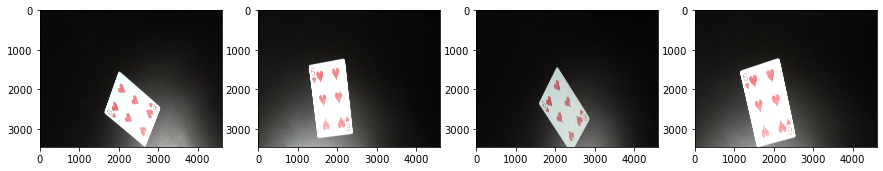

In [67]:
image_list
import matplotlib.pyplot as plt
from PIL import Image
img1 = Image.open(image_list[1])
img2 = Image.open(image_list[2])
img3 = Image.open(image_list[3])
img4 = Image.open(image_list[4])

f, axarr = plt.subplots(1,4, figsize=(15, 15)) 

axarr[0].imshow(img1)
axarr[1].imshow(img2)
axarr[2].imshow(img3)
axarr[3].imshow(img4)

,path,image
0,/Users/ericmiao/Desktop/Poker/images/4H19.jpg,
1,/Users/ericmiao/Desktop/Poker/images/4H20.jpg,
2,/Users/ericmiao/Desktop/Poker/images/4H21.jpg,
3,/Users/ericmiao/Desktop/Poker/images/4H22.jpg,
4,/Users/ericmiao/Desktop/Poker/images/4H23.jpg,
5,/Users/ericmiao/Desktop/Poker/images/4H24.jpg,
6,/Users/ericmiao/Desktop/Poker/images/4H25.jpg,
7,/Users/ericmiao/Desktop/Poker/images/4H26.jpg,
8,/Users/ericmiao/Desktop/Poker/images/4H27.jpg,
9,/Users/ericmiao/Desktop/Poker/images/4H28.jpg,

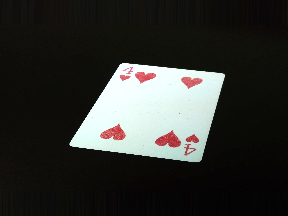
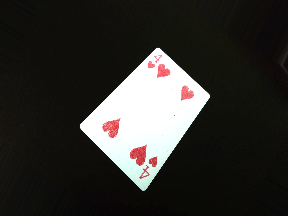
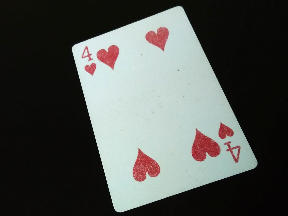
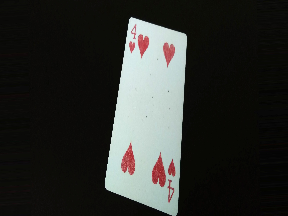
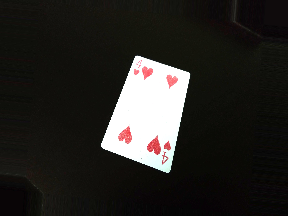
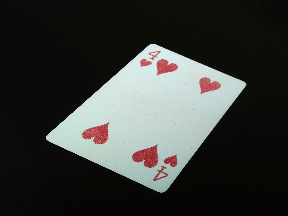
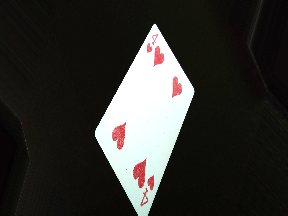
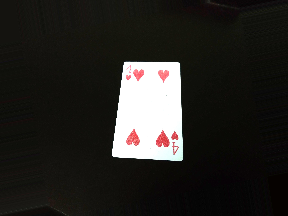
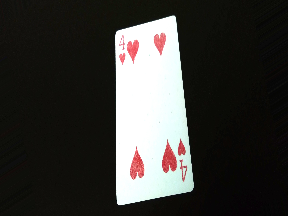
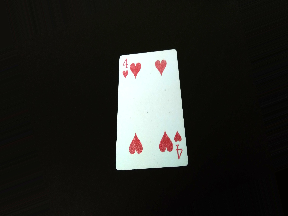
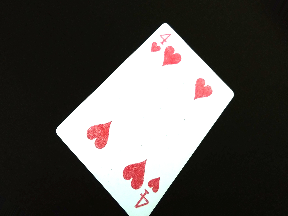
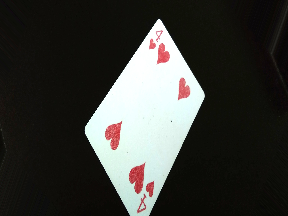
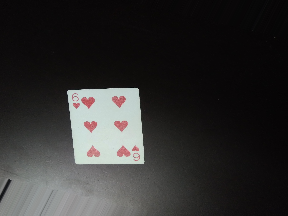
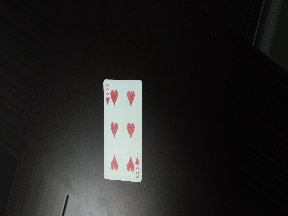
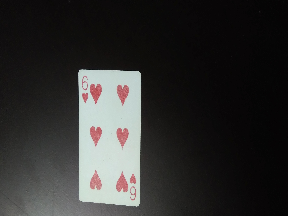
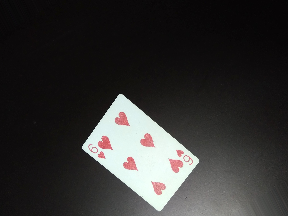
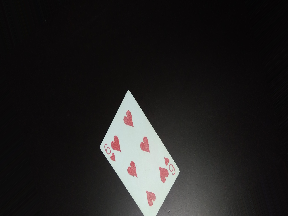
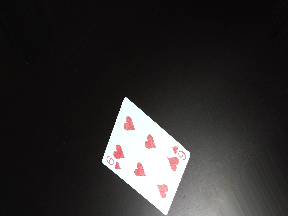
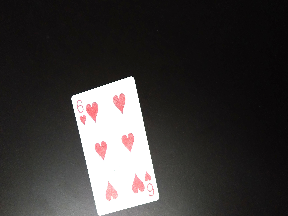
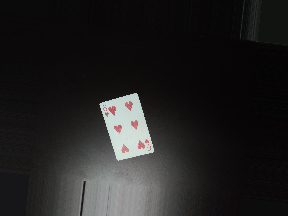
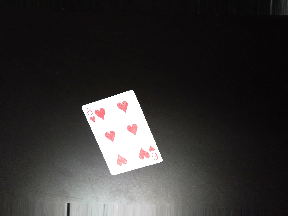
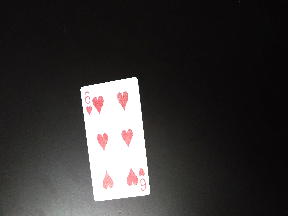
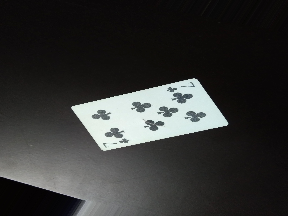
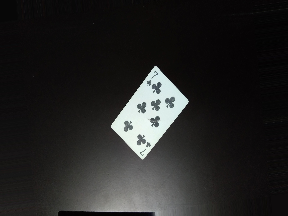
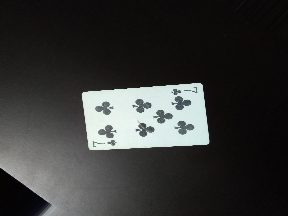
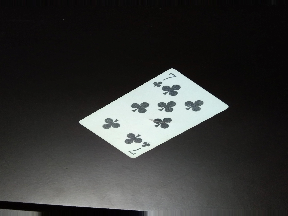
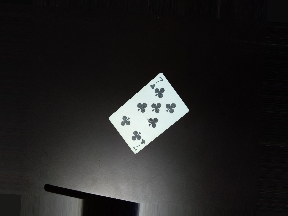
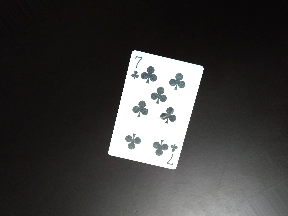
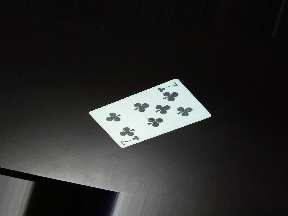
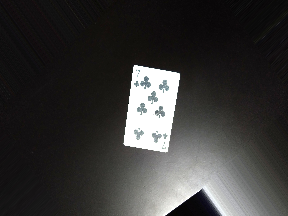
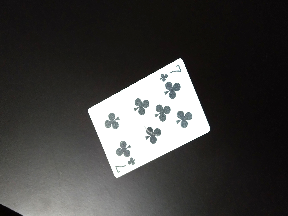
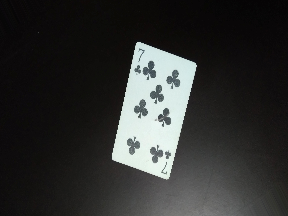
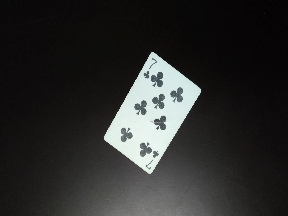
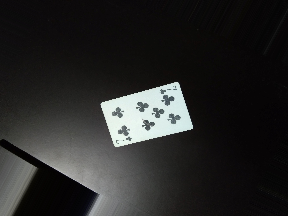

In [76]:
image_data = tc.image_analysis.load_images(directory1, with_path=True) 
test_data =  tc.image_analysis.load_images(directory3, with_path=True) 
labels = ["4H", "6H", "7C"]
def get_label(path, labels=labels):  
    substr = path[-8:-6]
    for label in labels:  
        if label in path:  
            return label  

# image_data['label'] = image_data['path'].apply(get_label)
# save data
image_data.save('cards.sframe')  
 
# explore 
image_data.explore()

In [69]:
# Load the data  
data = tc.SFrame('cards.sframe')  
 
# Make a train-test split  
train_data, test_data = data.random_split(0.9)  

# Create a model  
model = tc.image_classifier.create(train_data, target='label', max_iterations=1000)  
 
# Save predictions to an SFrame (class and corresponding class-probabilities)  
predictions = model.classify(test_data)  
# Evaluate the model and save the results into a dictionary  
results = model.evaluate(test_data)  
print ("Accuracy         : %s" % results['accuracy'])
print ("Confusion Matrix : \n%s" % results['confusion_matrix'])

# Save the model for later usage in Turi Create  
model.save('cards.model') 

Using GPU (AMD Radeon Pro 560) to extract features.

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 30               | 5.20s        | 100%             |

+------------------+--------------+------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 30

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 4098

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 0         | 2        | 1.000000  | 0.050579     | 0.900000          |

| 1         | 6        | 0.250000  | 0.183056     | 0.933333          |

| 2         | 8        | 0.216798  | 0.285504     | 1.000000          |

| 3         | 11       | 1.083992  | 0.463425     | 1.000000          |

| 4         | 13       | 1.083992  | 0.535671     | 1.000000          |

| 9         | 22       | 1.083992  | 0.891217     | 1.000000          |

+-----------+----------+-----------+--------------+-------------------+

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 4                | 659.755ms    | 100%             |

+------------------+--------------+------------------+

Accuracy         : 1.0
Confusion Matrix : 
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      4H      |        4H       |   2   |
|      7C      |        7C       |   2   |
+--------------+-----------------+-------+
[2 rows x 3 columns]



In [70]:
print ("Predict")
print(model.predict(test_data))
type(test_data)

Predict
['4H', '4H', '7C', '7C']


turicreate.data_structures.sframe.SFrame

In [74]:
print(image_data[0])

{'path': '/Users/ericmiao/Desktop/Poker/images/4H19.jpg', 'image': Height: 3456px
Width: 4608px
Channels: 3
, 'label': '4H'}


In [75]:
print(image_data)

+-------------------------------+--------------------------+-------+
|              path             |          image           | label |
+-------------------------------+--------------------------+-------+
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
| /Users/ericmiao/Desktop/Po... | Height: 3456 Width: 4608 |   4H  |
+-------------------------------+--------------------------+-------+
[34 rows x 3 columns]
Note: Only t

In [79]:
image_data

path,image
/Users/ericmiao/Desktop/Poker/images/4H19.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H20.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H21.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H22.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H23.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H24.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H25.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H26.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H27.jpg ...,Height: 3456 Width: 4608
/Users/ericmiao/Desktop/Poker/images/4H28.jpg ...,Height: 3456 Width: 4608


In [82]:
img = tc.Image('https://hatrabbits.com/wp-content/uploads/2017/01/random.jpg')

Downloading https://hatrabbits.com/wp-content/uploads/2017/01/random.jpg to /var/folders/4f/s0frkn7j7qjbtgmznm3pvwpm0000gn/T/turicreate-ericmiao/4799/91557722-10d8-476d-aac5-1ac26495f64e.jpg

In [83]:
type(img)

turicreate.data_structures.image.Image

In [104]:
b = '/9j/4AAQSkZJRgABAQAASABIAAD/4QBMRXhpZgAATU0AKgAAAAgAAgESAAMAAAABAAYAAIdpAAQAAAABAAAAJgAAAAAAAqACAAQAAAABAAAAdqADAAQAAAABAAAAdgAAAAD/7QA4UGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAAA4QklNBCUAAAAAABDUHYzZjwCyBOmACZjs+EJ+/8AAEQgAdgB2AwERAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/bAEMAAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAf/bAEMBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAf/dAAQAD//aAAwDAQACEQMRAD8A/jd1v/goh/wUAg1bUYov25/2x4401DUFRF/ae+NgVVS/uUVVH/CbcBVVVAHpnvQBlf8ADxb/AIKCf9H1ftk/+JP/ABr/APm2oAP+Hi3/AAUE/wCj6v2yf/En/jX/APNtQBYl/wCCi3/BQbd5L/t0/tkI0REeP+GnfjShDKAj7yfGqkEsuW3NhSWJUchs4JW9om5Ka5r80pJpvmjyrVaRdlyrXTfY7sTKbqPC1IKlLDyjh1B0qVFwqU4qjVdaclGalKrTUpKrJxpuVRuzj73s/gX9vH9vrWIoRdftt/tk3UjvZwrFbftM/GNpUa8dla8eL/hMZJLmGBUcmC3QoHlgLzQDaj/C8Q5pVwM5ujiPZRSrzlKtOrGDVCKcaEZqUY0p1JSSVWrPm5Y1EqdRpyj+7cK5VgXlWDxGPy7LZ1HQ9v8AvcHQlGpJ0pPldRQjTUqs/ggpzo04+9CnzWhS+6fhB+2z+26st9e6l+1z+1Dr91b3Nk89pB+0D8W9RtdYe3JltrTT4LjxfNJHeX8Zh02WxtBHFcXj7ERncz1+AcW5/nFWrgMJgc1zigsQ5U8PTlj8dRr0nWlCnUjiJYOrRqVKMKnNVp1pVHiIUX7tSDioHZiMsyaetHLsJRpcijGNbB4OMqDlrVc6ioxUqcZNyhUqXn7Je9ypNR+yv+CgH7ev7R/7OPwB/Y1/ZB1T9qT9o/wP8W/CngO01f42fEKD42/E6/8AE95488QxXXi/xbdeJPFE+uXHifXNLTxd4iksdE06S5a30nRbWx0vSV0/SdOgsov6HzqeaYjDYejlMavt6CpYjE4VV3TrrC1JqjHCupRrQnGpGDrVYVYuqqn1OrB885wjP8ly6nhaeKxONxbwdalVqzp0vbUsLhaFWrKVSc60afNToYWnJKSjTh+6oSq0aUYxpuPJ+Aerf8FCf29Z1bU9P/bt/bFtLS4+1zxwXH7VXxquJd0M1vH9jjhg8S2s6yAzh1uLiFLORH8pLya4tbot9Dg6+JptYTEqVatT9jTlUpUHShacKkvbynUxVam4tU3F06c3XhKPO8PGnWpcvBm+BwtaH9p4OcIUK0MRipOTjSpTtio0I4fB4anhKNWFSlKcYVfaQnSTnF/WqijOrLCh/wCCkP8AwUKgEip+3X+2Owkgmt9sv7TfxomWOO4GJTCJPGrrDIw4EsarIuSVYE719CpRp1HFyUk41IVbwlKDlKn8Km4ODnBdYSc4y0Ti0j52nWlTVRKMJqpTlTtUi5cnM03OnqlGorWUtbKT0bd4+v8Aw2/4KB/8FAvHXxF+H3wpsP25/wBry60bxp4+8BeEpbj/AIaL+Ktrq9zNr+s6Nod29jqh8U2+pQQTT3F2lrM3kXMtjPGdViM7OkXhV8JVhh8TmdSeJo5jTwuOq0accXiqmEpcqxNTDKthZV62DlVpwnRlUj+9oQxNN/VXKnGMp+nRqU51oUqVHDTwyrYek5VlRjiJ051KcWly+xlVvyTi6kaHtI0589XlqOM4/wButp+0j8c55oRbfG74pSWXm/YxOnxE8WkM+mO9pOySz6tGZZEaCZ5CV2zFVk/eKxZvh/rmNVr4vFaq6axFb1/n5ej6/fc+o+q4e7vQo30dvY0rK+v8jvdadPJHdx/tC/HOVLa4b4v/ABXRvtJm8pvHfieF51ludjK8baqfLARWO0IzCOTzIogyrV/XcW9freJ/8KK33P3nt57eViXhsNZ/uMP/AOCodOq9300v5XVkdto3x9+NNzesz/Fz4nu1tIDZ2z+NvERjJaT+ILqDeas37u3jW4ctHvZiF3Oy1HG4u6vi8T5R9vWt36S2ul089be9Dw+Ht/u9C3VqlT+fovS91tbY9IsPj18XGNvJ/wALd8fSQNazRyynxbrzxu0c0pmcOL7gkwGBHXZJGoEmCMh91jcW7L65iUrS1deq1f1T9Er+uusSfq2Hf/Liiv8AuHDT7lLbTS1vXXl+xv2Jfih498VfFPxFYa/478Wa7ZWXw+1GZbbUfE+s39ut2PEnhpYr0Q3d/NHHNJDPcRpLjzPL81FYIWVvWyXFV6mLqRniK0orDzdnVnJOXtKPvWlKSTab280r68vn5nRpwoQdOlSg3VitKcU7clXS617aX1tfSyP/0P4GPEH/ACGdT/7COpf+nG6oAxqANPzbeCz8tVSWedHDO8MDGFm+zn5TJG8oHlGVEdWTbLvkTJ2OnJyValfmk5Qp05RtGM6iVRL2q15ZKPxqMpRaleHLGXKnJT+hVfBYPKvZUoUsTi8XSrRqVauGwdSWFqVHgZXg6+Hq4iKWGlXo0qsKtH2eJ9rWo801CdCmlzPGcrI3KPHh8SLscBXXZIGUhlVQRt6KOeMrvKlTlo4r4lK69180W2neNmmm3332V7nlUcfjKEnKnXm26dSi41eWvB0q0YwqwdOtGpTcZwhCMk4u6hFXfLE9S8K/Fq/8O3tpd3Xh7QNVa2u7W48+OK50O/jhtYJbYW1idHng0e1EkMz+ZJNod55soWW4indRXyOb8GYbM6FajRzPMsGqtGrS9nKdLH4eU6tSNX2uIWNp1cdWcJwXJGnmNDkheFJ04txPs8v8Q83wtPDYbFUMNi8Hh6dSk6UI/VKtRPmlR9+nGph6caNT2Vo08Gk6NP2MXTcvaR/oS/4IVaX4S/bk/wCChXwA+D138O9WtdE8E65rPx48e2HmaZrugXPh34TaVc+I9Ekv9QWLQJtMN78TZfAmm/8AIGvLVIriO2knCXLzQfm+V+Fea5PxZlWaYrM6Oc5bTk4Tr0nicrxuBlTpTrU5Tw8q2OhjMFOOG+pV6ccZCpWljeapQlh4VUeviOO6GYZXmUIUsRhMzqYCpTp3nGpQXta9LCzpxrRtUq+0wNWspRqUaMVzTtKThD2vpX/Bxj+yn8evGX7WmseN/AvwI8f+IfDei6Hp/wDaWv8Ag6zsvGFlPdandXG+3Gj+HtYv9cs5LDZDJJPF4fe3ubS78y4uLdNKYL+nU8xw1HP8TOdahTo4ihRw3NOpiINVsPLEVbNPCzw0KTjUnatVxlFupy0Yxm5QlL5BUKlTI/q7o1ZTVd4qi6dKFT3YwUEm5V6NRRre1lZUliHGVFp0vehOP8tniHRPE/hXUJtD8U6Jr3hnWIlD3eja/p17o15EkvMLPpV/aWk9uhUHy90QUgDytoUCvocPUwmJTq4athsTGnN0/aUJwrOFSKTnCpVhOV6nvRlJPllaV5J8zcvKxGKx1OHsarxlH20Zyq0asnTw1WnKXLTdHB+xpU6NOmoOEFHnhBwSo+y9moHPds57jjnJznn04xzk55GM811nnW0bur3Strd3vqtLWVkndp6qyfvOP2//AME4PB1p42/bd/Z80i8tkvrSw8W3Xi50dSIUufA/hrWfGenvK7DbF5OraHZKk0mIxcCIgkMK8LiKo4ZPivflSlOdCnFRqck6ieKpc9NOLvJVaMZ+0p681F1I1Fyc6j6uVUb5hR5IrEQp03VqyVKUoUueha81OHuujiKsKUajSj7dQdKb5oTP7OpLqdmgknm2XKXkcHlwKkkf2+4mtY5JVigO5WKpc2KNKTDIG85Mqa/NOdr3W2m9HFbO1l57Nct3KN+l1dn2Xy+f6HounF1ktXhlaa6Mt6IUdJRm4UTcMzCXc0SNGokyAoJxu3pTVT3U9Eld+891fRpq/Ldc1na3rqQ3p2Vvye1nffVa2v5pHcaFfNa21o4yjS+bKwiKFVZbqGJRgHzFYXEDQhGUHYisd+4ulKpFS15U7Ju7fV2tp15bdbb2vqTLrdO/nqlpr26NaWdu521hexpKI83UdslzqETooaTdbXAOyIdknmWOQ+ZN5cSPvlDA/I2ynF25W7e9ft6Ja993a27T3J0/Bff17ef/AAdz75/4J5xNN8XvE7pIID/wrDUQ8Cc5A8WeGEjdpmGSEWNo4498oXMpEhzsT2sgf+21Um7/AFabaV7pe1o/m/62PMzV2w0NG/38dv8Ar3V/4B//0f4GPEH/ACGdT/7COpf+nG6oAyMEDJU4OcHpnjtkYOMgnHP+6SCyvfRNXVrq/n16q9mlrb1sWk4pSlTlyzUlGTTSbUbe63FxfK5xlJK72SlDmvHbutLltNGtdQmg8qPULkQ2zs7O0j2ULS3wH7pI02pf6a7RhneNJoDIVaUrXBRxkK+NrYaFTnlhqXPViopKMa81HDv4pSfM8PioqdoxnKnU5UlA+kx+UrL8iwuKr06VHEZjWwc8PSniXVxnsqNHMHjKtSiqNKFCjVlXwDp0+apOMYw9pJTlNGFXoHzAUAf3Wf8ABmP+z3HF/wANx/te6vo+nO2laN4N+AfgHxCdravYz3EOofED4o6dEXgzbWV1CPhLcP5Vyy3s1uFuYU+x2zy8+IbjTqz95Rp09X9l87ei11nGNKV7qNoz0lrLl6sOr2Xuv2k7axbkuSO3NbSMnUjdLdxTly8sHL9E/wBqXxGviD4u+P79WkEX/CRmxt5guI3WApbeUu2UxoiXasWuVBLBZIyNwUL+Q42t7bF1ZxcknKSvyuz3v1erd1s7/wB259th1alTVmuWCVnpLTutbeislpo7pnyr4p0DQvG2l39j4w8OeH/E+mXck0M2meIdD0vWrWeFLB4AY7bVrW9idReSeUqsuwxKwG4AleZ06c4qM4xnyTUlGcYzceWzg7NON4SSlF+809Yt6OPRFyhJSjKUZLaSbUtXfdctrNaWX/gOnN8h+NP+Ccv7EfxGZ7zXP2e/Cmjm1lhhM/w7n1X4c/KIH866/szwVf6ZY3EgJcJbvprwtKsTYYZdfWp5xmdCbqU8ZipSnF071as8RHkvzNxw+I9pQjNPeoqcanJ7qlyNxjxVMBgqkVTlhqMU5KV6dONOd0nFfvKajNQ97WLqODdpOPNFM/Oz46fBr4B/8EnfEHhj9pj4U6F4t+Ims+K/EWtfDfTvhx4v8baRb6T4e0XW/Dl3qmoeIdH1+08IXPiJdY05tHsNOWHURq9qLfxBfrPLG5hin9LCVMXxI4ZbjcRS5sMqmPhiZYaM8Q5xlOhZQpVMPQpqFHHSpKdKlzypqEak6k5TmcVdUMnTxOHpSlGpL2HsuaMIxVSNOcnKo6dWtNOeFjKNOdSUIuU5U1Dmnz9f4G/4LS/s26/daVB49+HnxS8AS37WS61eadbeH/F3h7TGgHn3D/aLLVNG169tnuY4ijW/hprh3dmNtAksrJnW4WzWhTnUpww+KaqLloYauo1pwlWUedPFQwmHjy02q9aEq94qNSFKVeahGrpHPMBKpyXxEKd5Wq1aEF7sU3Fyp0quIkpSsoqMXJRlJXly8zj9/eB/+Civ7GXxD/f+Gf2jvAel6hBFKF/4T+91D4abrhpE/d/Z/H9noEE4S3JW1NlczIWjWNpZZJFC+ZXy/MqNadKtl+Nc1TVSUqWGq16Cg3Ll/wBpoxqYVzXLJzpqo501yucVGUZS7oYnDVFRlDE4ep9YdqVNVaftm+d01GWHuq9ObmrQhUpwlUUo1KadOUZy+8/AusaN4j0rR7vw/rGkeILDUUnurXUtNvbLXbB4A8z2kscmmTXcE4mkczjbPktEcH5ldfLVSFW06c4VITSlCcGpwcWrwacW001rzJtO1la75bkmpPmTT00futdGrNX0tb7PfyPVdPFzHHPDLKcBpYoHdQs8ks/y3b3MQOI9okmhgjVXSR5djMFBdNYTcL2e65e9vPS1rXva1n2X2Y/r+t/Lr95+hn/BPdIl+L/iNojEJU+FF1FcK6s7ozeKvDM8MaNl08tEkbcFVfnbg4AFfQ8ONvHVG221g5rpp++oWXfTbby0sjzM1t9Xhd2/fR62+xU/r/hj/9L+HPWvBR8LTxeLNZezl8yebWodHuYrmRtja1qYs1vP3SWQXUms5RaWkl081zDC9wVEEsIr4upnyzjFY7JsDGvDlq18DPG0pUoLmVKl7d0bzniL4RV4OtVhRUKU6kaXOqkKkj9hynhHLMkwf+sGcVueWAwdHGzwsp0o8mNUPbqhRnGvBVK6lWwmGpU5wqQ+uauUoydKOJ4d8Pa58UvHtlaabptxJb3N55ixWSPBbafpyS/arkQSywPHAkKzPcYYSkbsL9oJTfWZ5nl/CPDlevisVThUpUOVzruNSricU4exp+0hGopVJVHTjS0cL8t5KilLl8udPG8VcTf2rUp4mGS4OVOVHETjUjCNKhGlVpUKdeWHpQq47E1ascRVjHmdqlSrGrPD04TPXf2o/DVp4FtPhZ4LiUfabPQ9e115Mgmex1XU7bR7O4bEce55rjwvqMry5YTOzSpiJo1X4/wnx2LzupxRxDXi4YfMMXl+Fwye3PgaeLq4hR9+bjGm8fToxhJQlBUuWUW1zz5OPq8atTLIqcXKlDExdP2nPVp0+TBxpc6lOVT2bjBxpTlpN06qTlKE+X5Jr9iPz0KAP9Tb/g2x+CEX7P3/AAQ+8KeNJ9KuNB8RfH7xF8U/jh4mW7mZn1Eat4lm8BeCNYhzLcRx2l58N/hh4Zvra1gNvEsd8bma3W/urxm8/Gz5cLXnG7dSdRLmvp7OMaTjGMmrR9pGT91Wk7zV1L3vSw7lKthaM4xiqNKCvThTi5Rq1ZYlTqTpRUqlTkqxjzVZyqwgoUbxhShCHxp48vItU8Q6nqUqPOdU1bUrs73k2RxPNdXMbMNwPOwOrM3L7ggBCpX5HKTnUmk+XmqTle9lrNtppLRb2t13vbmPsoXsk9Ha299bLZq17at+t9dzy5GaaWCK1w1gUilvURUR5buUmQhTJKpCzFVRg5VXRHAKEk1NuV8rbam0rrWS6q91uurdutk/s6FWBLe1jjmVmuZnMLxF5DtZ45zceWfJDmRnSXdGmQpmkgiACxmratZ6yvvrqtdLWtf8Hqrt2uH9f1/X5n87H/BdPX4v+E0/Z78EC8WS50nw38QfGMtk21Li2tPGGseHdMspZIR8ywT3Hg/VEt3IAd4LlBu8o7fs+DrOWY+5NciwqU5QnyXk8TzwjWt7Kc0qcJVKcJSlSjKlKajGrBz+ez+pUVLDU02qNSpUlKN/iq0IwUJNWuuSOImou9n7SW9vd/BavuD5gUHGRxyMHIB7g8E8qcgcrg4yv3WYMW230d92ulte++z0vrukUpNKSVveXK7xjJ25lL3W03CV4r3oOMnG8LuEpxl0/hPxv408BakNa8C+L/FHgvWAoQat4T1/VvDmpBFbeqC/0e7s7oKHAYL5pAYbgMgGufEYPCYr2bxWFw+J9k3Kl9YoU63s5SVpSp+0jLkbWjcbNrTpeN069eipRo1qtKNTl5406k4KbjflclFpS5eaXLfbmdrXk4/b3w5/4Koft7fDKOwtNH/aI8U+INMsZLYtpvxA0/w98QVvobY/La32qeLtI1bxC0Uilo5JbfWre82Oxjukc718mtw1lFWNVRw86M6051Pa0q9XmpznJyk6MKs6lCnFNtRpKj7GC0hTSUUdtPNsbCUHKcasYR5FCpCKjJKHJFzlSVOpOUdJ80qjlOcb1JTvJS/rt/4NoP8Agoh+0p+2t+038a/A3xF8GfCVNF8Afs+XfiNPFvhfT/EfhnV5NX1L4keBNMsdM1XT21zXdMv4tRs01e8W5totIfTn0pIUgvI9Rd7Xz6OVYbKcwoQw8sRUeIwWLb9v7N04+xr4HmvVp+zqc8vbxVOEcNUhKMasqlajKNOnX7KuNli8JLmhBOnioPnjL46dSnVVKKw75vZyg6VaVWcsU7qdGMKLSlVl/9P+QP4Xfs0/FP8AaB8a2x8Z2/iLw18PPtl3rNrNfW11bXviSK9uneyudDivLZYtQfVLKSAW2uTqtlLpsSxabLJFEka/kfEHE+T8LSr5fw7TweM4mxUfYykqbqYfA0YVqkJxrSpTVnRrRryp5dCtTlUxUaksTUpNynL9TliMfxLLB4/Oo06WS4Vxq4PKoVIxljJwl7s8c6MKc1RqRdRTnGOHnGlWlLL6GHp4yeJP1G0H4PaL4G1I6H4f8O2ek2WhXNhY2cCQCO+uJ4LCHR5rm+vGt2+1TxwQrA6P/pRe1w8oiANfzpmOFzbMM7xmIx+JxeNksRThCOMrTtJ1a0MRVlTi6csPCFPFTxNf2FOnC1WdoRoU4Kc/oZYz2lGKbSThJRhTUadKjTTvCjRow5YUaUE1GEILkhDSMVsfkl/wUG1KKb9o3U/D0K7V8E+D/Bvh1iFVY3lvdK/4TGbygrEbYpfFbwOCkWyaKVEj8tUd/wCovC/K/wCy+GpcsoOjjsxxGMoQgrKjCNHC4CpTceWKjfEYGvUUY3ioVIpcukI/lvE9eFfMly83NRw9OlVv1m51aqcX9peyq0/edryv2vL4ir9FPnQoA/2M/gx4O1b9m7/gjV+yf8MtcigtPEHhT9kr4G+FtagtXcQf8JHB8KfDQ8QfZ5JIreVlfxFqurNE7wK8pcGWNWYovhZ5VcMAm4ODdJTlFa8rqXnJSkrRTTlH3rS5mvdsz2svpR/tCcacnWjSnJRqOCi506aUIt0+aaTajzcvM1G1ryspS/BrW4T/AGhPEzAqXkWO4GJY96226RVOR5pImY7MLGkm4o7MxFfmEowXNyyjzNp8z1tdrS2is2tNfVq/u/WRat5Lu/112/FWTtdM56C3MMU0qkxbyAty/wA8TLapLtQwL92RvMBZzhYy2xuWJaaiu2rS5pR1Seto3dpJ6JLXVPe+kr+6/v09f87P037c10oytYxiOOaOAvILqLdI0iwSQpAokkez8wqXiaZoFlGCkhk2o6uoDuHtJf3bJO+7kmvdau+9mlbW99be6a9/w9d9H+DXd3ufyJ/8FhvGB8R/tueLvDv7yQfDHwX4D8BG6kdGF5K2j/8ACcXU0aIziFIrzxrcWRiJ3LJaSsc7ga/SuFqNSllfNPltXxFWrC0nKXKo06Mva+7FKbq0ajtFzXI6b5lJzhH4/OqkJ4y0VJSp0oQqKSSXPzTn7jTblF05wd5KL5+ZWcVGUvy5r6M8gKAHKSuGBIzuU7XCsQV2uO5CsrlTldrDcvOGFJ2ejV7WesW1dO8X0TaaTsndWT0ujSDlTtUUpRUvaU37OooVHCUOSrF2vKMKlOo4Nyi4VIucPe5ZxFOzYuN/mbn3527NmE8vbj5t2fM37sDGwL0YsLm5ne3LaPLa/NzXlzX6Wty8ttb8190N+x9jT5fa+39pV9rfk9j7Llpex9nb33U5vb+1crR5fZKGqm5f3A/8GaPgq90/xt+2B8TRF9ot9b8KeFPAlr5cW97abwzrFh4h1DdIQV23kfi3TMIH3K1gxdRla+bxuInPPqOF9mlTo5RWxEaqlLnnPEY2lSqU3D2dlGnHC05RknJzdWSaioQlV9GjCnDLZVNfaTx0YybnFw9nTwznSUYqN1O9ar7Ruo/+XceSEoTc/wD/1Pzr8PX9l45urDxr4M1a48X6Pqmn3GsWOoTfbIJI9HM4kXUbWw1l4LqyaxMdssceowq3ngRJaq9m9fyzVwk6WOqUqanWr4atjaOJ9pU9pOlUwuKqUK/s26rpxWHxFH2d1z05uKcJSjCMpfrcakJ0acl7sKtOhVptJrnhVpRnT5tIv34y5rNcyUrSUb+90fhzwXcXEem6jLBdGfUbRH3eUNm+S4877XdozSAySC6eN2WbzZW3yDcigJng8vbjTxHLOUqlOMpNK8XKUnPnmnde0bqSjJ80pSertaKCpVV5RurJvS+u1rRaSulb+VpLS27P5af2pNeuPEv7R/xw1W4mS4H/AAtDxlplpLEFEZ0vQtbu9C0dIwny7ItJ02yiQjO5UByck1/RvDODo4DIcsoUOb2csMsU+Ztv2mPnLHV7XlJqPtsTU5Ip8sIWhFRioxPzXNq/1jMcVU5VG1RUrJ3v9XhGhz7LWp7Lnato5Na2PBq90849c+AHwo1D48fHb4LfA/SbiSz1P4xfFf4efC6wvYoPtL2V14+8XaR4VhvRb7kEws5NVW5aNnRGWIh5EXLplWc1SqeylTjVcXGi6q5qftp+7RUoqpSc1KrKMeSNWEp35YzjKScdqFP2laEXCpUjfnqRpfxPY006leUXyzUOSlGc5VJQlCnGLnNOMWf7Fv8AwUZ1G18I/AnwZ4E02QfZzb6fZWEKFIYvsNnFIsaN5e8DbaWlssAEnlsFUBG3KK+X4rrclNLW8pKnJNtawjaEra3XuxbdvNcr+H2Mlu6tSdnaUZNPdqU9XG/RJt7/AC1ufzteIdKlnurb7JKZFdgJoXgWIWwlkjuUwN/Ee2GKL5AuFL5PzEL+eJ8uyu03Zvu/ltruk+t72PpotJO6t133/Oz/ADvey2I7vTzHKIZI5jbBy6ujRzLul2wtHLtJODn97E4RfKVCuWCstRjb3ryfKkkra2k1FrrpaXR3fW6SBO6bulbdfjvbrr0+XQgg8PyX1/Z2ah5o2uTCkkrRxx+W9/HawRlm2Ya3itwPNC4eSV3O9wjVrOHJbltZPmitXrfp1TSstpWXe15Pb77tK++7to99Omi0drn8I37avi7UfHn7W37SHirUDHIb34z/ABB0+zlgiMUB0nw94k1Dw7oaRgvJkxaPpFjE7CQ75I3cBQ2xf1TJaUKGV4KlGrOq/YRrydRw51LFP6zKFoQglCm63JSUk5KlGHtJzqc05/FZj7aeJq4ipRlTp1JunTm6c1CpGg3QvGU7pyboP2nLJrnVRLlS5I/MAGepA4Jyc9hkDgE5Y/KO2T8xCglfVenRvVbW6u19bbbvrba7sjgik3ZyUdJO8uazai2o+7GTvNrkjdcvNJc8oQTmHbOe545yMY59Oc8YOeDnHFAW0Tur3atrdWtq9LWd2lZt6O6XuuSUCHLu3AKdpPy53BBhhtILEgBSCQxJ27Sc5GaTtbVXS12vtqmkrttNXVtb7WepdNz50qcuSU70+bnVNWqJ05KU24xjCUZOM3NqHJKSn7vMf6JH/Bpr4J0vwp+zVFrkVvOt58Trf4w+NNTkaWSOCaXSfiN4M+Hlm6AMSxWz8GLGMKsce2UoA807y/Ec9SXFuYqVadSMMBCNKMowccPT5cA3RpqmqcnF1nVruVWVSaqVpxTVNQhH3JO2T4NezjFqrK7UYQlPmniZKc37jnJwcYqcnJ+zjTjfljCMf//V/Cz9iD9qLwP8O/2ddA034l+FPEsFpZ/FD4g+DT450C5ufFWs3Gh2N/a+JtOlvvBaWi64vg61vPFJ8OT3vhu41aOwk0FN1hbxvfNb/k/EmCy7CZxiKtKeDp1Ma3WxCU6FCNGrCjTr1qdaUqsI05Vo3x9Ry9m6tTExbjPEYqk8V9fleYTeFo0qyqtUv3VOcnKfMuZqEleLtGlFxoRS5lGFP4owhaH7ReC9U+GHxB8CXXjL4ceJtI8X+F9ItZ765utI1BGbTbfSLO5u5ZNS03Md/p15Fcwsk1pqVvbyxbfJeLzAa8unGjUoQSSdOr7OUNbatKUGlpLmSlFSUo8yvZxTbZ63tlJNqSfxXd07P/g210SX8zWh/Ddr2leJfFfiq+1SDRNVmvfFuqTazBC8Baa6ude87WpBAQW86NVlmkMoYlIVWS58h5NlfpmX43LstyvD4WrmGGlHK8NDB1aqqOdlgZQwCdW8ef2s6kYR5bXnVlKNJVbc0vlMxwM6uNr1MJh8SqNVxrL6z7GFSMq0HWqRqRhNwo8kueCpynKcbQhNqpOETOfwV4pspHa80C9QWsMV9JFcQzR29xZmNp2KXiNHBICieU8Fvdi9MjNDDE00M4i3WfZRXilRzKg3VnPDxlSqQnUp1+ZU0pUWpVIe9LnjUq0PYKCU6klTnBz444DEqdpUHJwcXKneyqR3ko1IvkeiSajNVPfThBpSlH9Jv+CTGp33wH/bz+C/x48U+EdXbTPg5rN94mtbDVNFmnSTXtX8ManpPhRryCRIZYzZXGu2uvW1xDE8i31hYqkK+buTgzDiXA4dYCNCtTx0sRXjKrLBp4iFKhShVm8S3TnLkpuvSpxpSlz8/N+7bTjUO7DZVUnDFV2nSpxjKlhYVasIVas6ijdTgoy54ww9RxrJSpNVZpK7pVacf9Gv9sj4yQ/FaXwDY6LN59roOg6alwspXYXfSLWNTIDuZrpXWYsVKCI792ThK+YzrHrHypzTbs38Wi5Wrp31au9FpJdXbSJ62Cw0cLGUFyXlaS5XdqNtr3ldXffTrf7PwPc+HYromYwG1njQBTEGeAtGPLWIy8ERswJmkki2BJO2UNeIoSn7q91LZP4b2197TW6638t7Hc3p5Xv/AF8vu+ZR1jw+tjcwrjKXESvFcMis7fZlBZMbwRbldoj2IZyixGMbQ71tKk4vlcpODXTa6to9LtdrWfS+zkk32v71mk/OyfXWzvt95x/iKW28KeH/ABNr98s4g8M6T4h1u/VijSxW+k6LcXwZZTJ5eEuoDIzGVfMZmQYMalbVNStB2V3Z9l1fa3X3ru/VaBN+42lf3Xa22ul2nrrt0endJS/zzPHkusXOt61DrtjYweJ7ma/1vXb6xvJfs2onWr4a20QjhuJI7spe3bPEs3n3LTEtJcPBb26Qfa5FLDTwuExWFxeLxGXydHC4Oni6UZ4ijUwlGWDlXqVKlKM6cqlKl+9lH2VPk2pupVqzmsfQlUo1MD9SoRx1PLniqmJo18VQwWJw0K9SbVKhCo6tfEVMVz04UsTTXPiouvCFOm5Qq8PYaO1/qtjYSOmlQ3s1pG91qrSWtrYxXnlKl7dXBiOyy3SNJHMElYwoZDFJja3uYjHRw+Er4iKeLnQhXlGlg1GtVrzoczlQpUlO7r2ioypuUUqkuVSV/d8ChlP1jGwj7DE4XCShCrVWLhOnOhTnRS541Jwp05xq4lVqOAfNKdZ0rVqatNEM2miMX4NzZFtNXloJpJo7/F7HZ7rVygUkh/teXaPzLYxtHCpLLV08VzPDfuq9sU9FUhGEsPehKvasua9k4+x0j7tVSUpNJOWVbLOWhiqntMNCpgaMJTVCtUrRxPNio4VTTmuWlO3+0VP3t6lPEYRUsJS56s6VFZnkSG2keR4YpJWjiaZxGhmEXmeUrB44ZJTEgaUJhisfnbkTbXQ4RjKpVjGMZzjBSmoLmkqbny87XLKpGCnK0G/dTlyWlL3uGlVdVYbD1XOpTpzqKMJV5RioVXCTpUOZVKeGqTqRbVbkcHUqJ11KlGfLvW+malJc20tmZ7yysbSS8S+l0+W+s7LToZ7iW4uJrJ4LtYrO2uGma8TyZ4o7h5XO55V83zquLwsKVSFdQoV8RXjReHhiYYeviMTOnShTpU8RGrRc69WkoKhL2kZzpRgkkoPl9n+zK9Cth8Rh8Qq+Xww9SpTzGphVXoU4J4uU4rCV6c/ZVKU4VOeio1KlGtJV1JSq02f6en/BC3wbf/CbwP8ACH4WXMGnW2r+EP2TNDttdSwxPZDWrvWPAes61LFMIx5xu9e1nWLgzskb3AYSMinKJ8HkFaniM8zDEU6csPTxEMbiY05RpwnH6zjaWIaqeynUputzVW6zhUqKVRykqk01M2x8JU8Bh4SfPKm6FJyWqfs6E4e658r5UopRvy2Vly6e7//W/H/9mz9mi4j/AGU/hW2ppa2mp+IofG3jS4u/OilgFn8SNb1O58MqFmsRdNMfDC6XdXMMHnWsVwZld32I7fBZnhaGJxeOqQjySr15qrJqN3Vp4ejl0pP+IneGEgo3t7ii5QU7RPYw1apShRipL92lKKXNtKUqrTutL+0s7aO2j2Z9L/BD9n29X4q+B7GDUby90271ZJtVXS5ZLZdQ0RdLu9S1rSdXmsfKk1fS9VtLC4t73S7g3Gm36Xi/6EzMHXzqmCVKnKpeT9ndxaj9uWlm+WL1er1cXdNWaXNvSqt1o6Wu2pKLtddl0sm1o1e197n0d8RP+CR/wu8XaU2qfBmx/wCFTX2oaa+oLpN3HPe+DorW5tobqLTl0q9lk1nwlp0byLafYNBuItNijX+z5tIlhiiSLioZfSk8RU+qxc8a6tXE4mbl7etKs3OSqzqNzdOUpy56ScVON4WSZ11GovljUUfZuKjTtenFR093ltZpW5X73LvZXufC/if/AIJx+PPhH5+p+NfBUuq6YzCCXxTY7fEXhKzJmVZpLWWxV57J5FJKS6xY6TLZmEsHuYyVbnwnCuApSnKFKnXlWupQnLnpwi3eUadKSSslpByi5U1onac4TwqV6y5U7w6ReqclpbVX3dtLpvsrS5rHwJ/Zmh1n4vfDe2t7e7Meo+P/AAc0V7FJPLLqdvpXiGDXY4r5GlkSSE2dpIDOnni2j3RQPHbZSLpWTUcNKpUUZwm3Co5+0nKdR06ntKaqKU2nZ2hG93GH7uny0lGAU8TJzpRslZuF+XW04tSXZaNvRXbd3Zn9RcvhE3guJbqNmnkkjEKlv3g81JEnUGMMwaX9y8ZQFPLWXD7jRGkrWld3bvrZ6ys2ul3p0t6O53wqKDva90/JW3Xbt29LXLkPhV5lezthJ5VsXaS1cojfarxYoproBkZh8kRhWFn2RornBYbl2jT1bUHa70ut39219Fs9XzK1jSNa3vTg7y00Tty66W6216p6622M7UfCFxa2DRQQlXSO7a1QKkjofKkUNHcsFKKkhRYEjbdiSLg4CM+S6fItF1l8XZq/w6Wv0fbvJOtzPRPl0tfTTfaz6PTZ+ep8wftU+GZh+z/8VbOz3WNzr/hD/hEl1GJIbZvN8WX1lpE0cMdxFKsl7DDNM8UsgktzsaaOKZXlRpWHlXbp3lTU4Shzx5eZc0bNw5oyjzq6lHnU4X0cGvdlhUnaE3LmndWaW7V9bNctmvJd37tve/ke+LP7LdxaWt/q/hpvskuk3s9pplp9tW/tNZurS6eeC61zQruyFrDrM9tPO099okttcXKWtmZprQogg8WWVPB0a0adFVqcYKjHlrzWPqUUqcZKOJUadSFR04yjDDTq1sAnFVFhaMsRiFL2ctzOpTqT+tN1aVWMYubnKMqNKKl7tNRkoRSvaV4+8vdmpqnA+KtM+A/gvSfFXh5rzTvGupaTqU+pSWmqafJpz/b9TihS5ZLmCMhING06J3Ftr9lGtu9011Y38CSWnmV0/wCtWbY3BVFUrYenGpRVOOGoYSEcROFCXsq/1CrVxlanUlKpKLxKxMpyjTouWHg28QsP00MHhaNWrmFB0Y41VKuIqe0qTdKUsVUnyVlT5XT9tThXq0qFGEYRhRn7RuvWUKkI/GnwXutcvbP+yrXWdX/tLVWsbvSJ9Z0/T5tRNiJYtPvItXvLaW0iuLFI5tJvZx5ulma4hnWW1jlWFOXI+JKuFlLDyo0MFJSnSy7FTw0sTCnKviOStQVLD16SxNGdTlr1KlPleG9hJVZz9pGR6FZ4bHUPq2YTisJClzOnCnLl9pKrRqqb9k4V1y8knCMasOaE6ilCrOEJQ+a/iZ4Y8KeHPEKWuh3TtaXF35Wp6eHW/wBS0GRXTzord4pF0i7guEMkmnRjVJ7mMxSQX0sSm2uJ/v8AhnNM3zHLZ1cfTp+3o05LDV03Tw2YcsEo1pz9l7enar7tWdPDqlKLjUo8/vQl8rm+X4DCujKlhIc2MxdFVvZyaqUKdRKXJg6FSoqNOeIUKklHEUlGnN2or2FWnTwvYfDDwDpni/4reEfA1tF4kPhzx9438EeAoDLYf2bqmpr4s8XeFbNIfLSW9itWSPUZ7mM2tzG1+kccdtIkFzKIM8RjMXVwdKUqmAWZ4eGKxcpYessZDCewwuYUfa01ONF1qrlTpU+WvSqww9WT9tCU6UXP1auBpUKeMnRw+JoYRU/qlajz4rDrESq4nBxdWlGVPDyjhYV8Ti6NaKhQVSFSrTw/t6MZuH+p3/wTw0hdM+KnihFsreK4i+G11YMll9mis7e10/XPB1nbW1pFCVlMSxwCRmYbI5ZHhzJtSRvD4Yivr+Imo2UsNUs1ty+2oWt1s/8At3bVdTw83VqEE4rStDR6fYqa7S6W6dev2f/X9q1D9lZPBdnFpGi6Jc2+h6KbSHQ9DtNMex03QbCHTYdO8M2bWlr5EFlFp8TpN/Y8ThLQMLMqiWr18cqD5XL3pc8nUcp3lNym7tzvZ3bk29W7t3l1O72znOopKMZR93lhaKsrq0YrRJJKKs+m0bLm91+Bv7Odxp/jXQNaksbuRNL0XW7o4E8tuPtLWWiWxmZrZlSaGOZkaISw3EYmlUROBmLHFe7SVNp/vKkLb7wd7t3lG2179lvtHpwrbqc21oS0bScXLbzVtdEtfJ2P0b0/4VSmxdl0m3mlluorURyjcJbZriBxAu0fvYLgiLapYys6vGFG19uUaa5Ip2aTlb56+XR3vZ276HRJtNptt7N82j1td6W+9PbZXbM2++GtxOurTW9jGoe9iEVukccRt4zDuuoPMA+ZJHVZbi2uGceXu3byGjWJ4fmbs+V3TsrqUbtapp2ur943u9NG46KtaMYzXNpvdNO+za322a17qOqPCPE37Mnw4+G2r6Z8Xn8C3Uesab4it1jsPC7WGlQa0+pw3unz6ibER/2JBf2cV1d3ck1uunPdSLKjhZJkrZU5VOalObblCVqlT3pJw1UWoq7u9OZ7OV1zWuYe5TkqiSilJLl5rwbkm9OZLWy0ja3W7skfUXgnwjoHi3SBqHh65R71l81dE1GJtL8QaesUYaaOGyuMDUJlJVIjYSXFu6eYzsUTZXHPBzppuzsnZO94b99XfsnZ9Hb3XLpVWFR2i1fdu6/LS/8Aete26vduOt/wry8tJ0ha2tlbUJQRiKDdbyyT7pI7mQKDFtWJ0nVmdVwGbJLLQqEqau9XLp2tqtb7O9lZ9/htyy1hNPa9tm9kraNpct3tfbrqpW93O134etHJNcC1FxaLMsETwStErLIxlCAP5T+YriCaDyjvKMm0tvWnKH3Pr081y31e1rNb7LctPdJfLTXv5W0d7X287R+YP2wPhMniP4baJ4UFp/acureKtGuLm2hHmTTW2jC61GKMQbo2SeG8ltWlkYBBtZVVMAV1YXDRlUlJyulB3S3vKSs7O+q6rZ2vdWuY1Ha1t09Ol7qz/m772u9nzJvl/Dzxv+zTbW2rWsi2tnZz2FtrGrX8sck8N3JbW4P2uyd0DCN7e0ktXikZkmktvMhgAO91HRpzd017jkpW0dtdLb9O7XS7TIhVnrzfC+XTTSXV6JN7Xu+/TVR+K/iX8A9L8O3L/aLS1ntrCO4mA8yO7MS3DXE6Wk+lPE4v7SZZhJe3ok3RQTSuyKnEvn4jA0GvfhCcUpXUo88XGd+aEqb0nGSk+a/S62Z10qzirQ9y7TVm1ro7xfKrO/yvpqfG3xO+D/g/QfDGsa/4OvdL0XxJPHaa5DbabYaTcRr/AGTOuoppdkZWt7p7OW+nuY7E3n2ibTlvJDg28Yhi8HMMuwtHDVqsJ8rpyqYulR92UKNRKErUFG0kp1KcJNPnk1GNGTeHjCjD1cPi6lSrThW56tJc1NqU6i/iLkc5NSspKNrpJc3Irty5pS/Nr45/Bqw0vwxb+MdK0PUr2/g8SXGs+I71Lu1uPD62moWto2preWsUFldxyvrybQITHjS5VSKOGKH7RXbwznGKoVv7PxVecaWIwdPBYOrTox5Kc8NClTo0qVSFJxw9WE6uLVJYhexqWw6j7Ss5ufRXw+Gx9TDe1hQh9UrSxNNShBc9vfqfWYVJ+yxNGpSoYdV1PnrSVJU4SipThL7m/wCCf3hnWvjB+0/+yJY+LfCMEml+FfEkXjZLnQb+JtA0/RfBPhnxB4y8OrqenXMt3d3UUGqR6JDp/mSyjSb6LZay2MiS2j+HOVGlm2YYWjmNSso054SksVh3VzCcqeLhXxsnmFKLdOn7WE6VVVK1GhKjOWXvDVpzc6XZXSp0sRKVe2Ik+erCnKo41cRU/c1oqolBVaShOrUbnCMarjTrOnzRpTpf3/f8E+b+3034z+MdNtDKJpvhtqF7dJDbSiA+X4n8KpAVuHSRolhiufs8Fs0zebGjTDcFBX6rhtKOOqpf9AlRvpqq1DW2ttH1lrvZJo+UzbXDwbf/AC/j2/591P5u3kf/0P6vtY+D1rr0covdFs7cfbVuF8vyLaXVLYWzmKfYEVw0Ntbwr5zNi5luQIVGA6/Mxqq7Unbp8O766rZNpOzWneV/d73Qd7pWf83fu1qrX1T79Lbx6/4f/BLSNE1C7G2NNMFjp8NrbTMjJb+XC+pL5u2LKpM9wphRVEc0oYRoULilVnCaj7q0cns09XstbJppvfsk+pUISi5JSbvFJydtN3ponrfrzWtfezPZdR+Gml3ehidEaG9hmjgmt7afyhZq1ut7BdoXVViaGadU8oZRGkjeOSGVXDYyjFwcovlfNy8t9eW11JLXqrSu9NN7s0i5KSi1KV435ul76w/FWvdtX7Wj5pL4AjWK1tmtcD7ddbJozvh1CS0h+zWuUMco3wLHKJGjlWWVHacp8qVjFaWb11V9Lv5a9LdOmt7s0dr6f8N5bfk/W/2eb+Kfw5s1trLR1gdopL24vT5kRuLXyobG2trWO2jwqCc3F7KUcoQqMjyusi+au1Jay10St3/XR39bdWrLmmWq821ta71u3rpt5/fdHzVrfgZdOkl023EkaPdyPcMUe2aC4Ul7iWGcDdYuS8qQTWrI/wC63rtbc67J2d7J9LPbXT0++/y0YOknFWTUrprpp1a2d/LfWzbTTNXwz4p8RaPbXN3qVpH4v05fs9lbwanMyeI7GC1SV1nGseRLLIGMiPINVtL1Z0RYg4llesp0oT2SpvrZXi+14u/4Nd+yNYOpBvVzV7crte3T3tubfo973V0ep2I8N+MLqK2t7pNM1p4pLi30HXVi03UPtZP2O2gsJHMthcNth85jaXMmxjEqwhJkCcVWlOF5Ne73im16vVuN929UutrWOuM09t77X19dorT79dlo5eS/HXwZcW9n4dt9OW0kvodI1vU9TlvYI5EtonMXlhpVjjlOoJFbSYkkEbwyokbr5z7V0w0uRSne12rWV727ap6N3a2a10teMzi5NabXV76K+vdaNrs+7sfBXiTwvZ3N3c6dPoVwzmzuUlumgtIs29+4P2QRpIsjTK8K3ETpLMwRGhjU+ayr0OKbva/VPSz8o22d720e22r5YcWunzWq/rY+a/i7+zlZ6n4Xkv7u2t7O4ayuHheWGHz5oZbC/tbm3himQyXhML24Mi7ESZDHHDzGaxnBu6lbkduVq9/eukmuaO606a62tpEtJK1rXvruulrrZN+drfK8vx3+IX7J9vpRWHU9RtFg0rT7q30IXS2Eeq6FFqc6tqQsr7yXnvFuLieOVIFme9s1MwitxG0iV4+KwtHmXPThOVOM1SlNQ56aqNczpz5XJc9k2vdkuX7SudUK89Uk7NxcknL3nHbniu2utrPq4te98U/Er9lbxB4ssdb8Gatc2lv4cjW90zVZILyxi8TaitjJa6sI5tRiQXMr3dmyyP8AaoHFpZTSQ6fKFeR64YYKqqtGpCcaUqUuaM5QhWqOtTnGpSqqc1Ug2pLmjGrBxi0lFWbUuyniox5rw53OM4OLclDlqwlSmrRtKLtL3ZQnB8yUrrluepf8EevhDqOjfHL4i2tw0tynwV8EXFho9leQJJdy6N8WfF1vaaRqOpanbxtb2+p6dYeBPEmlx2MJl89JY9UuZbXz2tU8lKviMRi8dUpunGviKtHkcaUf9oiqCxEqLp15TjSqqnQxTjWo0+StiZ0qNSVOhOU/XnWo1HGUISSlSpOUm6k1F0oOnKEZzS9pdyTbcqlSKUPatuSqT/s+/YX0BU+MPitrWLyLj/hXF5LJvkuBlLzxJ4akdZZZZMtOlxDLHtG1TGiTBd80m36rIIJ42payl9Uk2t96tDV6xd7qz11smkvecvnc1V8NBp6e3jq+V/Yq9LS3X3O6TaP/0f7RfDtvZ3F8LC481bu28NWPk/vWtrq5bVUgsrdYZhI0kaqlzc3S24Hk2ce4soe6M8XyXw+dpPok3bz961m/O+zejUvX1fK1rHmV7eS1Vvkk2nrvoe1WOkJYILmGGF4n1K8uI1u51knso4LKy0CCyWfiGaUXEclx5s7P9kR5LeIuCHq5u1Om0qd5Oqrzkn7v7unFN2pxUlKcpK21lOVoWUs1K8mm5XSppci6pyqNqPxWcVy2Td7ta7x3vEMdlFprW7K0cl1PEYUhgaaWS7jeKdFAj/eFplt1t1+ZcxuIjlAUXfERpUqUIp2qSXvQdpck/wB23JNN/ElaKv8AC2nFNy5c8O5zqc8neEfik3b3Wmkrctvd1bvF6xT0veXGww3X2eBYLC4MyypdWC3wstOjjm1eWePMiSC8nnFnFJ5iSIvmxldgjLBd3BaTslFpu1udqKkp3UWm+bmWl+d+6lo7/FHrnbmk73jHmvy3lbk11s7J943ba2vc4jxpZ63e+I7S2uZNJjij0/T4JF+y3Gp+VNc3zytelpPsoY/Z7dfMaK3kWPdLJgEps1V4KXMoqTcUrO6fuK0lZtPmT5nbrp7mwXUoqS683Knp9p+78KSUVpG/K9Fe+p83eItL1syyznVtGa0kvbiEudDN022O5uJlmmBvoXeOW4kHnSFzEN0UiosQwxzOV9WmtVbrbe7sv6102jV76W1/xK/RWvZq9uqte3wraXN6d4K8Vw2V0xvfD2oX8J06a7N3YvZlnurxpI7eSK0uXgtGjLOFlnJF5kC6j80gwXHmtrq/u/DX03823rzEbaXjK2/uX7e7u9dbdWraa2OI1fStWntYbWPw7ZS3EipJfSadqwnafU7W8M8iRpd2a2oESTokCM7l3RZVYGPzFev3/J/Pe7S8vLU0fLe+tr2TcdlokrLVO/e976N3kzsNJ0jw6vhOLT/Ew8Ty6m51TTbTVbme+khg0W4ljs9Psftt89xDdWEV1FfXd5Z3JDqzSRxOibCvJVnFTty2WnvRUUr79tWuq5VrbV2vHeinJKzs+l/e2vt0fzeuzseN658LLrw9fyNc6hY+K/DJvbVrrWtNkUazp1taw3VvbWl5pNzFc3sKQ2l1OZdSt57mwTyN6yRF0kbWnVhKSin16aJ6atbJtvy10eiRclNWajytK97O2urdlfdx7J26S1PlDxn8QPCd1N4V8JLb2p1GW5m8P6lIQbhHN1rZ/wBHkuLi+jlvVkW1SKa4QW63CsYjGqhHgitWiouD+K6T7RS1utFvtrdrpumJK81o9btJJPR6JtWslFaLRN21tY/FP42/ECDQfF9l4f0hLC+ms/F2rXWu+JdXSG40DQLXyZ7O1sodNWCa6uLiN1S2aeyivJrBv3bPcJI8z+ViaqjUjGC5lze/UlrGHu720bTdo6LTe7ub0MPzc85vlvH3YxvGTfNv2irJvV6rZRt73m50zwTrVubfxIPE2heMtU1ybU5NZm0vUtU0uK81CCK8gK+JbKJtAtLK20KAW9xaaldpqLRXENrDEqK6pnF+973NGbs1Lkk43au1KduRpRS+J3d9FpcVSm0/c5Xqkotx5mtbLlclJpvtF2au7XTPr/8AYW+DPhT4VS/HDx7ezK9j8RfiV4N8HXuow+bLYWF9pXhmGys7exjEbtDpBvNYa/kBWC1gv9Qu38yFzurzsTRpQr1qqjH21adH2jUYpyjTjyU6acYRk4RvOovaOcoyq1IqSg4Rj1YepUnTjG2kIVIwskrrmlUm5b3km+W71cYxV2opS/dP9kOxksvjd4zY3b3e74eJb3Mtys6xyXVpqfhWMG1eX7NN5KwFMLPE0kivFOGWORDL7GQ642pUt7s8NU0fRqrQtdqS1s3pe3VXujizP/dobr99HVK+8KumnRf8A//S/sv8N3d/p+rareXdjBcXd+I7eytUZkv1istOi0y3EqTILbyhck3Pms0LRKQZ54QyJXyEm7vqr6JdLt7a66vq157Xl7H6JJfjf8/6sfQMGmz6nZaaNbsri3gNlDc3FhY/Z2tzeziW8uIpL1pVvSiRpHFLHCkMPmhAs0zCN1n2aavVjVdNJ2dJX56lnJc8puMVaNlLkekIR91ytOUxqNOSpygpyaV5uTcYpqGkYxa+J3XNa121zJyUequLiFFEKW4klitxdWsMcLJKLlQxJiR9r7v3i7wQZMNKsmd7qvXOvFezo04Q5o0qbp+ypyg4YnmTThe9SfKuXm5k5ylz+8uZcuUaMnerKpZSqyhUc5pxlSX80o3jG7TUbXjdxs1bmnVC2z39pdS7isFlO8csyASxC2aNTM5iwscc2+V3WYRt5iLs5DxphHlVWn70oxjSupfE06cn77VPklFSnHa3uvVzknLmuSqKnOCUeZ1UpRjdRbq/YXO3GUknFXi7cuuluc8h8QyBdV1PUEuRnyGayjeNhPZz+UllFJJ5T7ljtw804iEpjcFTMoJAqFbkg+6fSzavpJq7s9m10895a2tZSd2tJW6W000V+uv4I4ltLt5JZBHJaQwX0VtO8aShiZYmjtn2xZNwZLaSN/ITLLc4kcAEyIwL+v63/L7zjYrqUNd6XPKbeBdStF0+1hhWO9u7chpbhiDIVAUqouYEVok8oqIyZQqVztaa97vVNtdPNNeXTfcr081e62Vvm7vbyVjnr6z0tDErtHBpwu72eKWNXEkiw+bK7TAqfOku5LfyFcFipaPJIV9tc/Zarz0++z+5c3r1LipS1irvrfb77r7ne1tNbo9L0fQALSwsvJkkkm0PSb2/txG92FjlKXtxaKdpiXD3D3bXESI8z+dCX2qqpyt+0cnfROWltLaatX0bfnLS2l0dd7JJaJaK2nl97OC1jQNM0uC41G6QWOoRXl3frc2Mc+m3VjHKht2tLJ8CXLo8ExEYcWwugJ4xuSCudvlu1p9rT7O/lvZ9L6aa7R2i5t2i3Zq1nqn3e6tu9nd9LW5Y/k5+1h8JPDHxBudMvtPk1Twh4wub1r2Dx74dmNjr9nZaRcm61TVdVkFq1trU+nKXsxbeJNKla/8AMMkt/BkSxebXr1eZ8lTfV83K3ZbNOzaat2tLadjtpUoO++m9kktWlGOsn8TfvWs0ursmfyBf8FVPjpYfsi+L9C0bwFqnhDx5r/jd7nxfouj6pDNNDa2S6pHPN418V+H/ALdFqtvaaxqH2uy8Ki1utO0/xBeafqev2F/eWulG3l3y3LaubYlSalTy+lzSrVVGEnLEqUJwhSdTmTleTqKUaU4QUbykpSpKc4zGUMupVVUk54uULUKMb/avFSrSXKoUqaTckr1Kz5aMIwUqtel8CfBD/goF+3N8U/FBtPBXwe8F/FDT47x9X1yws/DniLRdI0+30yBrrUZpPF83i+20HwzfmxmMVlqOvz3ifbbmxt0sNRmubewu/wBT4U8IeI+NsRisPwplub5vWw9CriK01UwNHB4WNFQ5pVcViVgsLzpVYNUZ4lV6kXenCylOP5Hxz4y8D+G+Do5hx1xJkXDtCpVw1HD0K9atLNMfUxdf6vQp4DK8LLF5rmEpVVJz+o4DEKlRo4jE1+TD4fEVaX9TX/BMn9pfwb+1l+wrpFr4T8W/8I/8VfEviz4p3/jvwTrQ0rU9St/Gvg/VPDskM2g+IZTpct3Fpfg/XPh3rF3BJpFloc9prmlaMLJbhLqZPxzMIvC42eW4msniU51KTcJ0Y4igvZSWIoe0hD2kYKtSjXdL2tGliHPDe1lOEnP9bwVaFanHFU6dqal+9ipXcJz5lKnO3M7e5L2bbhNw5KjhHmSP3Q/YmPiLxj8V/FOrXOpX+nXGneDfEGnahaWptfs01/N4h8GwsbybVbC4upL2xj0fbbJHNEq2t/LNNFLFcWLQepkMZTxdTknKk1h6l3Dl95qrQTu505pq+1lF29bHNmjjTw8FKMZKVaDi5c2kXCra3JNbrdvey22j/9P+zq70i+8LSNpWpQ/b59YuNIiOpxiFDqLwwPqF7EDLI8trFC86ym0ZolCQQqYpoyrv8bdPmtd2vJ31a62v7qfrbe3w6c3tcreydr25uVpaNxva+l2nv63jqfUdk8HlR+QoZIXjtrUZHzeVar86NmUNI8KybZGfJQBGcZaurDy1ValBtwqU6VKMLLmn7H95LlamuepCM3Gbd+ZRTOSrCSahJ2UqbqTdm7RdR8kW7p8kZcl0ouzbko3SU87UnuAtgbaFzcRkulxdtvW3EDrD592pZFK3KsS8kbm4OAEibcxTKtNx+rVYKXtFapFzk24qFRpVKia5W61S8uZz/u8sU4c3RQiv9ohJxcH7vLTS96Uo83LTe/7tXio+8lq23ZuMF8xmE8YSZ7cTLZyMhG6WzuytxeJDtXesdvFBKEiBcCCXCSb1ES41Zc8pyg26UZ8lo+4uSblNwgteWmnCThC01Hnd7yZdOPKoKSj7SUPaKMtlUg/ZxlO9uac3USlJcjc431bR43e3Q1DSdUv2jAWa8nhuofJJC2sE0zWO377JEbx1hLuGjJEQuUE67UtW5Y22V0lpovXd37636dXFytzS96/qt9tHZWTv2VvT7PDWV1HZXmoS+b5U+yV4ke385HtSsXmytaMpDW9tLK0rIAhV3aPyxhDS76a9NdH69fyenlaQo+7zO7V7adH53/r7jC1Q51G91n7PLBIdKvoYDGiT3KSWj27TXVvJLtjCXFpA+xJf3kbM/LbRFT082t5X22WnSy17b3vJ3sXGOqvF6NXe/e22rbenkt9kc2IvtdvHEL6b7XcSQWkdtNHF5qw314traJJciNHLrHdTMwKIXmlkMbv5IWpcryemi6JP5v7OrXbdLdXvLoUeVNKy1vps/lq123emqcbo+hbqDUI72NoVhkvJbCS2lFtc7TFY6HE6uqx+bGBvji8tldFQlUYNK7O64e8rWabe9t0k732VtF72lu1x+7FdVHmtr3nLbrvKXTTXp9nxb4hjyZLdlCziWw+1rA8kl150k90r2r3E6QBoLiMxR3FxJCqYjthIrqmxmyrJSb2S+9Nt7taa7em+ux00bavr2Xprvd9f5uuiR+M/7bnxH0r4dfDT46eNdUNybDwB4LvdM1FIJwUaIJ9u1nTwIPMluNQ1r7RJp1rb2pku7lkjRYmVnZvExK0qOzvGLi118+vWLulbme2t/d9SjeEab0TnJSim99bRu3orSV25WSje7V7n8KH7P37C/wAev+Clv7QXxH/aG+N83iXwP8IvFnxH/sTXPFmjtZS6p4q1XUWh0vwP8PPhLJrEcWj6z4d0CG28K+H4PFVzBPoOkeHbXTJrS11bUUTTF/rjwh8EMdxll9HNM0VbI+F8DgpY2liq0PZ4/M5PDyrSllUK9LFRjS5K0vaY61fCc9V4HCOvbETwv8N/SO+lPkvhPj3wxw/GHE/iJmuZ4XJ55ZSpLFZVw7iamLp4f2PFP1bMcurRrqpQqxpZXSxFDMo06EMyzClgoVcJSxv9GXwo+DPh/wCB3w0sPgX8O9Ii8JeHPBUfiTRZtEN6dc/teTU9XurqJfFMrxfZvFV3a3134juW8QTWvnRanfu+kTWVnp+n29r/AKg8JcKZTw7w5lmUZTh6GDy7L8E6eFo06fIkqsnWqYp1Z81edTGc86uNqVqk3XqupKrzTlVnL/ADxO8V+KeN+Oc/4q4qr4nG53n2bUlmFZSo0pRo5XhqeAw2X0aOD5cupTyl0cNDLZ4eiq7pyjVqSnN4edL+bO5+PP7O/wABv+Cg3w08M/s5m6+HPwF8N+LtP+E3xc8UWPi3xFpum6noPizxV4XTx/fyX2oaldRXVh8Pb3RdON14sUW8fj8eCbW5u57zw5Fol5X+U/0n6HAHEOfVMt4ByTCZJLhep7LH5pklDEYPDZ5j8txNaVXCUcrwdTDwrUcNSr5ll1DEy9rTxWLxX1mFHGYXBYCri/8Aok+iBjPGGjwDh+KPGbPcTnOccbqlmuW5Nm9DKqVbhnKsbRw/1XEzeW4XBYbC4nOaVDB5liMsqUYwynB1I4epg8rzapjcFgv9F/8AYc8QeGdf+Lms+LfC2tprPhTxP8KZr+w8Qx6ul5YeJJ4tf8JWw1WwnEy213A1tHGiXkG4TxtEysYijN/OHDtWnVxTr0KsalGtgXOlOm41IVKbq0HCpGS91xlG3LON1OOqb1Z/VeZ0pxwkef3ZxxKi4JL3Pcqtxdk9YvRpxi01bWzP/9T+3rxFLfwWNzdSubtbHR5dVRImhTyrkQ2TRToqxhfMtbUxWlrhlu7l12oyoJzXwclLmSlLm63T2i1ZJ2vtGyae2zSskfR3jGm3GNt079WpSv6rmcpLXaTatc3fCPjVL3SYYL6FINVk2LBLbFYbe/uJ5OZIt6mOzkQu5lWRfs0zpK0DqrtCnRTqU4QnFXVXSVOpCbjeXNZRv7saSUW5N2lfbngm+bjlSlOopN3itJQa5vcUOiT5qjbSWnvJuLSdrw6DXZkt7IM9w7eS8mnuXZI1ukiZFZJA2dheTdCZABKCq3EaNE3mVGIShLllPmlSnOi3bljywfuu75ne7aaaTXKneTblHfD+821DlU1Csl8XLKommk9NHGKa5VpzSi7WtHnJr0nT9XuJYporbTdKlv1gDTwSCQ2jl7fzY5d+EMn2o2kakA+UwlkjKouUFd325bOzdtHJLRattc17J30u7q7N5vltZtc07OUUnsm9dLJNR5Lvule9meHPq9uIFtZ7hPltDHJuYmKIafbx3EkEw8jBiljRGd2dz8olUOuS3Rzxulqnd6enR7LX/hm1dmfs7c/u3u1y8z2u9rq7b13St3uc3d3+ou2h3thax77qQQ20FvGWuC09xLeb/KKvEZGWNY5Z2LLcIzARpvR2bdmn0u+19Omz1bdk03Za2erKjCKvFvonJfZfT1tdPv3e9owHUbRVubS7e4DzebJcNIQkOmR3akMyC7jCS+bNJF5U+LcybJjsCks42rta3fM35LS9r2VtVZa9+yFGns4yvZ7apXXzWttL7XWzvcw9DtRdeJtHhuGltrabXGLyJLJDHLFZQjVIZT5nmxfKsLgR7kYvFGJQdyombdrv70uz73tpru1G9tLNc0t99O+3XX8Ovn9x9PS2VtaarGk9w1pFb+HImvri0fYt0Ps00ksyzOgkVZQqxEK5uNxUlYoZlapdoz1avyPma1Tk7v1V9F1+52iknK7S5rTcbae7abjrb3XyuLa5X8K7pSl4b4+lRprmVDdf2dqEUc0TwwxCZY5MQ4igiuCgi3Q7DEJoCkTTyFG2NWL3dtnsu3l1/Pbua0371kk7L5b6vV221v8Ady2sfzg/8FUde+BV3+zn+0L4Y/aA+JPxI+G/wu8S3NvpLeJPg94U/wCE78eeJfF+oeMbC/0nwNoWkT6Vq9paReK9EsPEFlqPia6tlm8LWFpd6pbu99JFC3t8D/6ry4owsuMa8MPw7h6ir5lUq1alKm6KrUlV9rUpUK9ZYenhvrFbEKlBVp0qUqdGrSnOM4eFx9jOMsv4VxOI4AwNDMuK1Ol/ZWGr3jSdSlCdaC51jstlTrTr06GHw01jKEYV66qVJKEGfNPxc+NtjLo3hm7/AGZ9X8Fa34B8N+GvC/xHvP2hPEPiWxt/2Y/gd4G0PSEvPh/q/wAR7/SNQttc8W61rNtHDqGlfCnwNpt1468T6npuhWfiW8+H+j65D4rg/wBZKef4TBcPSeVrBVsPXyzF0cLmMJYSpkeW0KmCqzhmeIrvGYWOMy3DOnh4xwuXYyLlDF0qlWvg8FKeMh/z9ZhwbiM94ujjuJc0zLLMxyzPsJjK3DCw2c1OP+K8zweLlGlkOV4CGT4vD5FmuOzGrDCZtnfFGHhi8FNVK+SZBxXmmWYjI4/y2fta/wDBTnxnf/Dax/Z4+DHxT174gal/a/xH1f42/tdahps3hbxx8a7/AOJ+o3l/4j8IeDtDCWq+A/hRa/a/strYwWNhqTWNlovhjw/HoHhbw/e3PxA/ljxC8cM6o5XQ4G4T4qzHNcLhsNVwvEPGFWlhcLiOIMTWqVqlfD5Th8PR5MqyjCuusLRq4atUr14YPCLC4pYTDxxGYf6CeDX0S+Gq3FGO8W/Evw64c4ZzfE5lgsVwX4ZZRi6+Pyfg3B5PgMLleAzLiHHRqwpcV8UZhTwlfMsTWxuHWFjis5zfMMfgp53m2Mhlf4xGGZYUuGikEEsksMc5RhDJNAsLzRJIRseSFLi3eVFYtGs8LOFEqFv5qdGrGlCu6VRUKlSrRp1nCSpVKtCNKdalCpbknUowxFCdWEW5U416UpJKrBy/u5VKbqSpKpB1YQp1J0lKLqQp1ZVI0qkoX5owqSo1o05NKM5Uqii24TUf7Mf+DZz4y6xrnxI0jwKnjHVb7RfCf7MXxrtdd8D3V/aTaND4msPjp8EH0DXdP8O39vcQWlxp/grXrDS7nWNMtoV1FtSMWqXF1fwKYvgsJg4UOLcyw1DDzoxq4GePVadTEVKV8Xi6VWvJRhiOSk8ZjamKlBVlGcng68cNCNClLm+pWInHJaVac5y/2mhQUqTS5FCli4QpVHT5eWfsqMJRhKSk4WqSUudTP//V/tn+JUon0bWlW5lSCJ9E0sxJaQxBoJ9RuwqSqtwY7mGJtP8AKjSVUYW8hyzMQifBzg3NpPSKjurN3vo/e+y1ZO+q1ajZRl9DC3uwlH4ueUveclzJxu1fvzOWnKlLaLu3LzXT5DPALVpyJotJkvrjFogt5HgVQsSoLpSyGNpuXULufbLBcqFZFyNdrbvS3/t7+/p2dyZWilKKtbTzsra9Lu76/O97HQx+PfmGm3L6hcQXV68NjdsEa+s7m88u1WKZpLtxeWKRmcRvLJ9rtw0ao0kahEUotp7aXv1vppunt6/J2N6dk/ecmn72iS0+/Rtu7aeu2lvdueIdUOneELq3aeae3vBBa2xkt98sTXut/wBjXDzBr4xSJFBbL9lj2MsaHy4/JI82pjp7NK7Taer1s7377W01+61jWXJ8UU1dNfOCcm+tr3suX1aafKeIzarHML3bNcxfZzBcXUUdrAIp1vXvYTPGzXDTJcJDHHD5RkFvJAvkybs71tqTV77tPXu9L9Onn8lfmjF0mlrd36aadOn3pprzMb+0Em0gXEU98ht9TWfS3kYNJbNBYRmVmxLgNHBceVahTIg3ylgu5mlpOUY8qUW+bS7026rXpf7W/feRo3Z32Teier/Dpvf7rFLUr2S88QQRxeWhj0kzeXLA0kEifZmuYI5U+05kEoSCS637wJxKFV42RV0tKVp3smlFK99L9dE3rbRtbbvUSUYp73crv56eez8l5vVHpHgprGTxHp0k/wBpltIrTWri3tHVJl/tRjaxTSzb51UwkzM8JRVeJcwoqqQylVPl2Wr766a72eiS0V157lxaTvrs1t308u//AA+qPV/E+o2qwj7LJdeTJbSIRPbwllN7cWplcbLr94SjLF+9ZtsKRwphIwG5al4tLdWu9WtLq1tX1bv7y08x0rT5rpr012Xm/K/2dfS54r46tEOmWc0d1JFFeWjmWJbSHetzerLE8om+0ZkUKbV0RlVIpVkaNCqojKbajdWu3Zfdu9/usvNlU7OSvdu60a0/ms3du3u20v0vZXR/Dp/wcNXF8nwE8dfCPS/E/ifVbux/bI8CX+qLr8ulaf4a0TwnZ/AvVltPBfhKDQ9O+3XmmTeLJG8cX9z4q/tHVpNf1TUVj1RdLstF020vInCWb0ueLUqdCrGm4Sn71dxc5VKt5tSj7CrOCiowipxpy5JSTqHTmNKtLKcRXjKlOE4U51FVguenRjjKFBLDuMHar7f2V3Ob/cTrx59YU4/yZap4k+Nms/Cnwt8DNR+IV/P8IfBniLXfF3hz4epq9xbeGbPxR4jEC6t4guLC10eFdV1eWOAQWl9q5vrjSraa8ttKeyt9QvY7j9Zq8RZ5VyfDcPzzPFrJcI6rpZbTqeywrdbEvGTeIp0lD6244lyrUXivbPDzlL2DpqUlL8lwfCHDOA4jzbi7C5Ng6fEueQwtLM85lGdbG16WDwmHwNCjSqVp1Fg6P1XC4WnXpYJYaninh6FTFQrVaNOcfdv2Ev2BfEP7aX7Qmh/BhPG2jeBtI/sXWfF/irxEyX2ralbeGPDgtW1ODw/pY061tb/Xrx7y2t7GPUtR03T4Fee8uLmU2qWF79L4a8Ef6/cT0slqY3+z8HRw1TMMwrwh7TEvB0a+Gw8qODhL919ZrVsVRpqpXkqWHpOriXDEzowwmI/OPHzxfh4KcA1OLIZPLPMxxeZ0MjyfAyrrC4L+0cTg8fmH1nM8QuavDBYbA5Xja3s8LRq18Zio4XAc+Bo4qtmeC/Y//gpn+wP8OPhd4E+Df7Onhm4n8P8Ah34CfB39qD40eCZ9Mk+26l4u1LVl+FkFwfHuualbBkuptV8LW+qXkek6NKkw1fUbOxu9Ls7XTbeD+vPEXwn4LzPgzC/2f/amUT4J4Wz6tlWFwc8JTy/FYmFOWKdXMI16WNxVSriMZTpVMZiaeJVbEQ9q7RqyhOH8J/Rt8avFLEcV8c8ScQx4ez2t4i+LfhZkGY4rEV8fTxGS5XnFLP8AAUsLlGCwuFw2DnQwWU5bRw+ApVatH6niYVMTjKudTxtWWHZ/wa0eCNTsf+CgvxdaRtMlEn7G3xEADXN2+Cvxt/Z4JPy2Vvj72Od+f9nHzf59YqsqFOM5Ook5qP7tRbu4yevNpb3f6sf6vUOXmkpRi9LpyV2rPZK/Lre7bTfuqzSbUv/Z'

In [110]:
# raw = tc.Image(b)
import base64
d = base64.decodebytes(data)
filename = 'newImage.jpg'  # I assume you have a way of picking unique filenames
with open(filename, 'wb') as f:
    f.write(d)

In [112]:
i = tc.image_analysis.load_images(filename, with_path=False) 

In [115]:
print ("Predict")
print(model.predict(i))
type(i)

Predict
['7C']


turicreate.data_structures.sframe.SFrame